<a href="https://colab.research.google.com/github/PSY21801028/SYPark-HGU/blob/main/AI_0404_rev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32
input_img = Input(shape=(784,)) #784 = 28x28
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoder = Model(input_img, encoded)

In [2]:
#need to re-define input layer for decoder input
encoded_input = Input(shape=(encoding_dim,))
decoded = Dense(784, activation='sigmoid')(encoded_input)
decoder = Model(encoded_input, decoded)

In [3]:
outputs = decoder(encoder(input_img))
autoencoder = Model(input_img, outputs)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [4]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

11490434/11490434 [==============================] - 2s 0us/step


In [5]:
autoencoder.fit(x_train, x_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 7s 5ms/step - loss: 0.2779 - val_loss: 0.1918
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1723 - val_loss: 0.1529
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1442 - val_loss: 0.1339
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1291 - val_loss: 0.1220
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1188 - val_loss: 0.1135
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1114 - val_loss: 0.1070
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1060 - val_loss: 0.1026
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1022 - val_loss: 0.0995
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0995 - val_loss: 0.0972
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0977 - val_loss: 0.0957

In [6]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


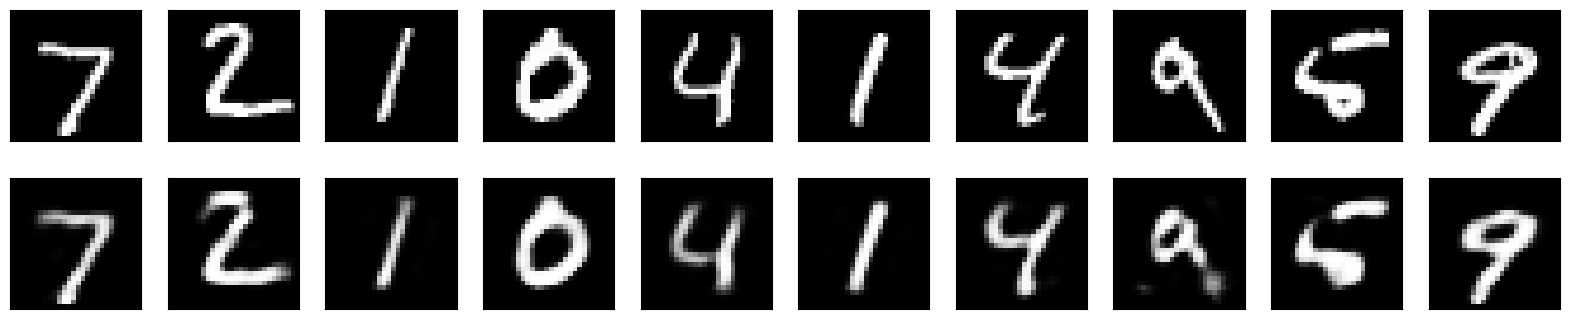

In [7]:
import matplotlib.pyplot as plt
n = 10 # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [17]:
def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

#AE Implementation (CNN)

In [8]:
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
def preprocess(array):
  """
  Normalizes the supplied array and reshapes it into the appropriate format.
  """
  array = array.astype("float32") / 255.0
  array = np.reshape(array, (len(array), 28, 28, 1))
  return array

In [9]:
(train_data, _), (test_data, _) = mnist.load_data()
# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

In [10]:
input = layers.Input(shape=(28, 28, 1))
# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)
# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248

In [11]:
autoencoder.fit(
  x=train_data,
  y=train_data,
  epochs=50,
  batch_size=128,
  shuffle=True,
  validation_data=(test_data, test_data),
)

Epoch 1/50
469/469 [==============================] - 12s 9ms/step - loss: 0.1336 - val_loss: 0.0730
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0716 - val_loss: 0.0695
Epoch 3/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0692 - val_loss: 0.0679
Epoch 4/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0680 - val_loss: 0.0672
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0671 - val_loss: 0.0663
Epoch 6/50
469/469 [==============================] - 4s 7ms/step - loss: 0.0665 - val_loss: 0.0659
Epoch 7/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0661 - val_loss: 0.0654
Epoch 8/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0657 - val_loss: 0.0651
Epoch 9/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0654 - val_loss: 0.0648
Epoch 10/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0652 - val_loss: 0.064

313/313 [==============================] - 1s 3ms/step


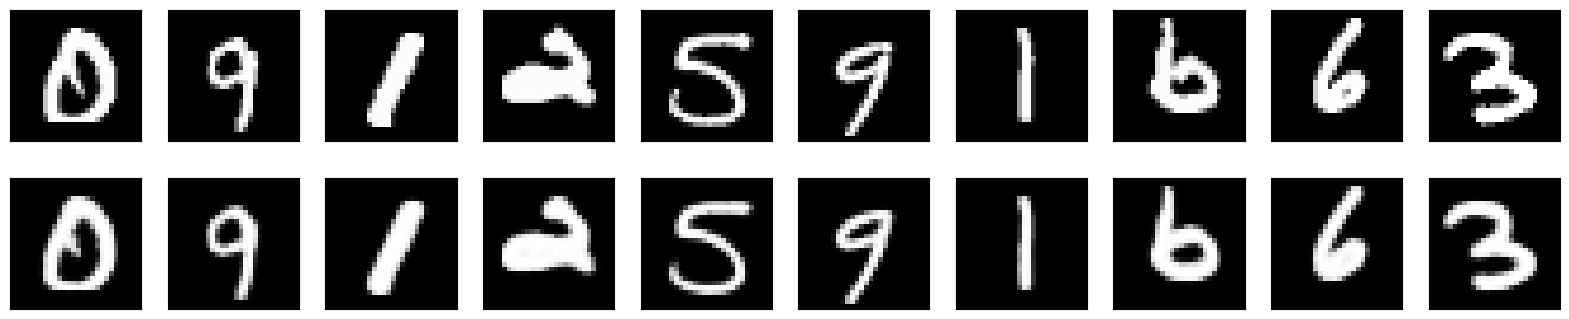

In [20]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

# noise add

In [13]:
def noise(array):
  """
  Adds random noise to each image in the supplied array.
  """
  noise_factor = 0.4
  noisy_array = array + noise_factor * np.random.normal(
  loc=0.0, scale=1.0, size=array.shape
  )
  return np.clip(noisy_array, 0.0, 1.0)

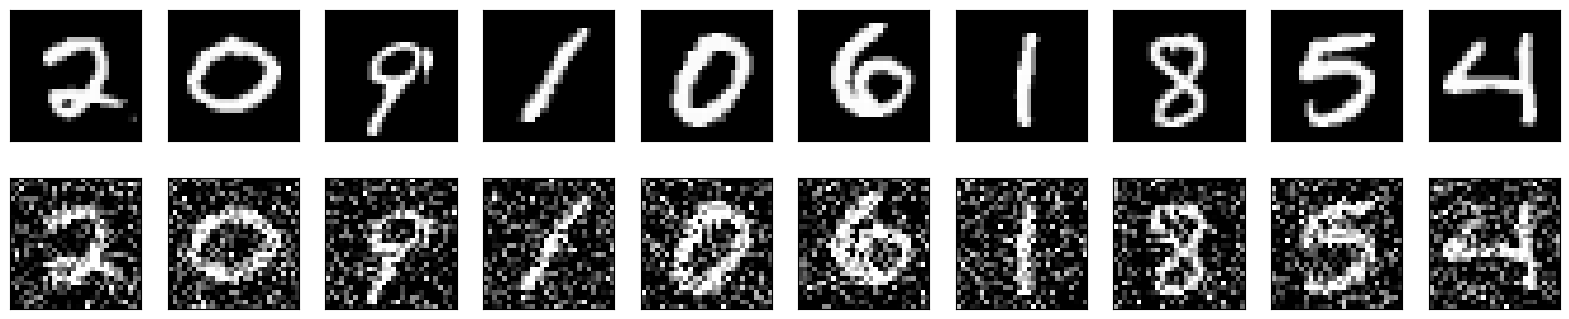

In [19]:
(train_data, _), (test_data, _) = mnist.load_data()
# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)
# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)
# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

In [15]:
autoencoder.fit(
  x=noisy_train_data,
  y=train_data,
  epochs=100,
  batch_size=128,
  shuffle=True,
  validation_data=(noisy_test_data, test_data),
)

Epoch 1/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1026 - val_loss: 0.0945
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0938 - val_loss: 0.0921
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0921 - val_loss: 0.0910
Epoch 4/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0911 - val_loss: 0.0900
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0903 - val_loss: 0.0894
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0898 - val_loss: 0.0888
Epoch 7/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0893 - val_loss: 0.0884
Epoch 8/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0889 - val_loss: 0.0882
Epoch 9/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0885 - val_loss: 0.0879
Epoch 10/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0882 - val_lo

313/313 [==============================] - 1s 2ms/step


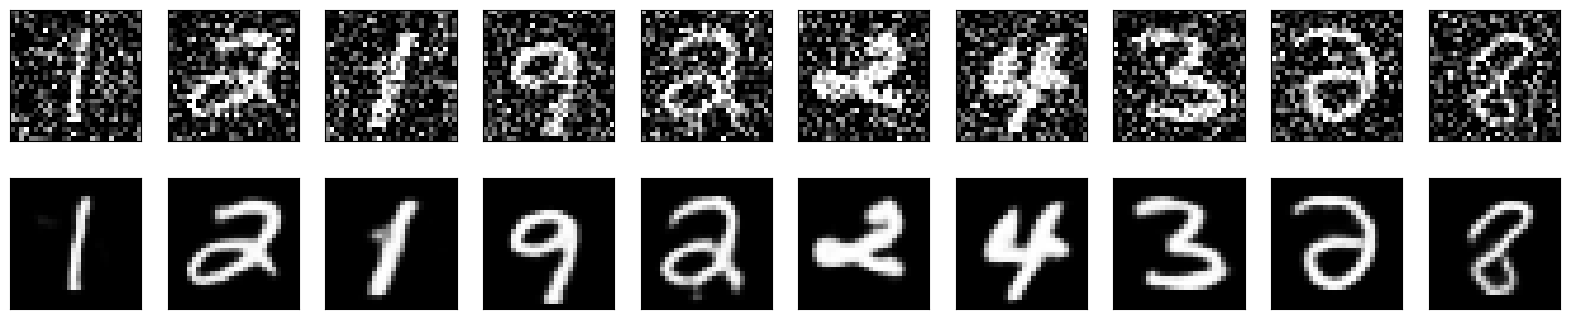

In [18]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)